In [29]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
import sys
import cv2
import imutils
from glob import glob
from keras import backend as k

# Import self written files

In [32]:
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../scripts')

import helper as hp
import selenium_scrapeImages as sc
import pix2pix as p2p
# import pix3pix_tensorflow as p3p_tf
import pix3pix as p3p
import deconvolution as deco
# import general_gan as gan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
searchterm = category = 'hela cell'
num_images = 100
s = 128
squared_img_size = (128,128)

# sc.scrapeImages(searchterm=searchterm, number_images=num_images)

# Look for a random (blurred) psf-image

In [36]:
path = '../data/2D/google_search_images/onion_cell/'

images_original = hp.load_tranfer_images(path)
images_blurred_gauss = hp.create_blurred_images(images_original, noise='gaussian')

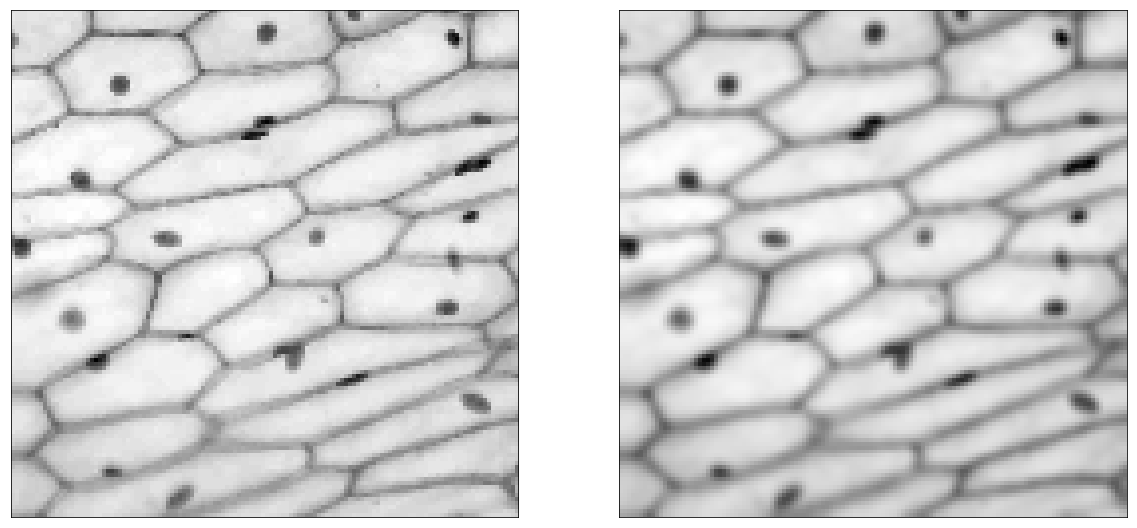

img sizes:  (128, 128) (128, 128)


In [37]:
random_number = random.randint(0,images_original.shape[0])

img = images_original[random_number].reshape(squared_img_size)
img_blur_gaussian = images_blurred_gauss[random_number].reshape(squared_img_size)

plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(122); plt.imshow(img_blur_gaussian, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.show()

print('img sizes: ', img.shape, img_blur_gaussian.shape)

# Pix2Pix GAN

### first show an example for the blurred images used as condition in the GAN

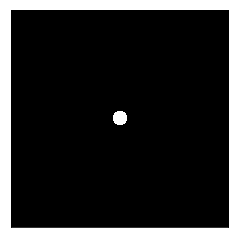

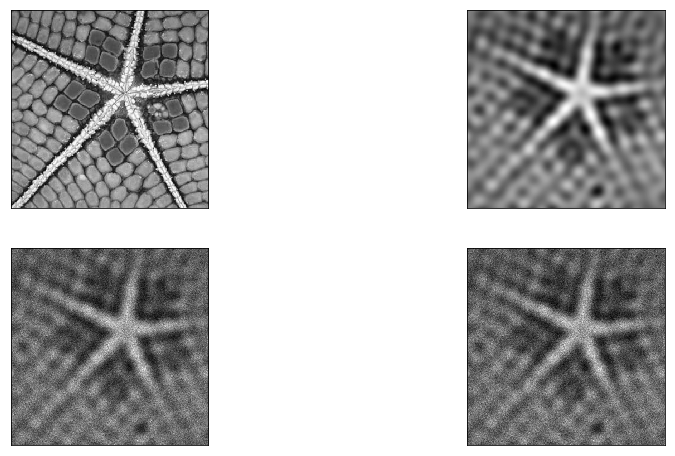

In [38]:
img_test = cv2.imread('../data/2D/test.jpg', 0)
img_test = hp.tranfer_squared_image(img_test)
img_test_blurred = hp.conv(img_test, f_type='ft_low_pass', radius_perc=.07, show_mask=True)

f = plt.figure(figsize=(15,8))
plt.subplot(221); plt.imshow(img_test, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(222); plt.imshow(img_test_blurred, cmap='gray'); plt.xticks([]); plt.yticks([])

# poisson noise
NPhot = 100
img_p = img_test_blurred.astype(float)/np.max(img_test_blurred)*NPhot
img_p = np.random.poisson(img_p)

# gaussian noise
sigma = 2
mu = 0.5
gaussian_noise = sigma * np.random.randn(img_p.shape[0], img_p.shape[1]) + mu
img_g = img_p + gaussian_noise
plt.subplot(223); plt.imshow(img_p, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(224); plt.imshow(img_g, cmap='gray'); plt.xticks([]); plt.yticks([])

plt.show()

In [39]:
e = 10
b_s = 32
s_i = 10

In [45]:
# import os

# cmd = "tensorboard --logdir=logs/"
# hp.openTensorboard(cmd)http://2012-0637:6006

In [43]:
# init GAN model
gan_pix2pix = p2p.Pix2Pix(squared_img_size=s, d_name='onion_cell')

discriminator, generator, combined = gan_pix2pix.train(epochs=e, 
                                                       batch_size=b_s, 
                                                       sample_interval=s_i) 

finish Pix2Pix __init__

Epoch 00001: val_loss improved from inf to 106.24444, saving model to logs/2018-06-14_15_04_00_CP
[Epoch 0/4] [Batch 0/9] [D loss: 2.481643, acc:  26%] [G loss: 66.641731] time: 0:00:46.888348

Epoch 00001: val_loss did not improve from 106.24444
[Epoch 0/4] [Batch 1/9] [D loss: 13.533777, acc:  10%] [G loss: 74.151001] time: 0:00:51.212179

Epoch 00001: val_loss improved from 106.24444 to 71.45134, saving model to logs/2018-06-14_15_04_00_CP
[Epoch 0/4] [Batch 2/9] [D loss: 3.859478, acc:  20%] [G loss: 68.791290] time: 0:01:23.759564

Epoch 00001: val_loss improved from 71.45134 to 63.79767, saving model to logs/2018-06-14_15_04_00_CP
[Epoch 0/4] [Batch 3/9] [D loss: 6.116632, acc:  24%] [G loss: 59.665833] time: 0:01:58.805647

Epoch 00001: val_loss improved from 63.79767 to 43.23266, saving model to logs/2018-06-14_15_04_00_CP
[Epoch 0/4] [Batch 4/9] [D loss: 2.674378, acc:  30%] [G loss: 48.022232] time: 0:02:37.652702

Epoch 00001: val_loss did not improv

## Save models, gradients and parameters

In [ ]:
save_models = False

if save_models:
    hp.model_saver(model_instance=discriminator, model_name='disc_10%')
    hp.model_saver(model_instance=generator, model_name='gene_10%')
    hp.model_saver(model_instance=combined, model_name='combined_10%')

In [ ]:
path = glob('images/%s/*.png' % (category))
try:
    random_img_path = np.random.choice(path, size=1)[0]
    random_img = cv2.imread(random_img_path, 0)

#     %matplotlib qt5
    plt.figure(figsize = (20,20))
    plt.imshow(random_img, cmap='gray')
    plt.show()
except:
    print('no image-file in folder')

In [ ]:
%matplotlib inline

In [14]:
for layer in combined.layers:
    print(layer.name)#, layer.weights)
    
    
# optimizer = tf.train.AdamOptimizer(..)
# grads = optimizer.compute_gradients(loss)
# grad_summ_op = tf.summary.merge([tf.summary.histogram("%s-grad" % g[1].name, g[0]) for g in grads])
# grad_vals = sess.run(fetches=grad_summ_op, feed_dict = feed_dict)
# writer['train'].add_summary(grad_vals)

input_15
model_8
model_7


In [ ]:
outputTensor = combined.output
outputTensor

In [ ]:
listOfVariableTensors = combined.trainable_weights
gradients = k.gradients(outputTensor, listOfVariableTensors)

# combined.optimizer.get_gradients(combined.loss,)

In [ ]:
# trainingExamples = ([imgs_A, imgs_B], [valid, imgs_A])
sess = tf.Session()
sess.run(tf.global_variables_initializer())
evaluated_gradients = sess.run(gradients, 
                               feed_dict={combined.input:[img_test, img_test_blurred]})

In [ ]:
index = 0
outputTensor = discriminator.layers[index].output # discriminator.output
listOfVariableTensors = discriminator.trainable_weights
gradients = k.gradients(outputTensor, listOfVariableTensors)

# Was kommt hier bei gradients raus??? Dafür nächste Zelle laufen lassen
gradients

# Pix3Pix GAN keras

In [297]:
gan3d = p3p.Pix3Pix(vol_size=128, d_name='test')
gan3d.train(epochs=2)

finish Pix3Pix __init__
CAUTION: n_batches = 0 or n_batches = -1, data will not be loaded, check dataset name
test load_batch -1
CAUTION: n_batches = 0 or n_batches = -1, data will not be loaded, check dataset name
test load_batch -1

Finish training in (hh:mm:ss.ms) 0:00:00.001501


(<keras.engine.training.Model at 0x2839b77acc0>,
 <keras.engine.training.Model at 0x2839cbb3588>)

# Pix3Pix GAN tensorflow

In [239]:
gan_pix3pix = p3p_tf.Pix3Pix(64)
# gan_pix3pix.n_layer
gan_pix3pix.generator()

(?, 64, 64, 64, 2)
(?, 32, 32, 32, 64)
(?, 16, 16, 16, 128)
(?, 8, 8, 8, 256)
test (?, 4, 4, 4, 1) <class 'tensorflow.python.framework.ops.Tensor'>


ValueError: Output tensors to a Model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: Tensor("conv3d_35/BiasAdd:0", shape=(?, 4, 4, 4, 1), dtype=float32)

# Deconvolution

In [233]:
dec = deco.Deconv(size=128, gan=combined, dim='2D')

In [236]:
dec.create_model()

In [139]:
freqs = np.fft.fftfreq(27, d=1./27).reshape(3, 3, 3)
print(freqs)

np.fft.fftshift(freqs) #, axes=(1,))

[[[  0.   1.   2.]
  [  3.   4.   5.]
  [  6.   7.   8.]]

 [[  9.  10.  11.]
  [ 12.  13. -13.]
  [-12. -11. -10.]]

 [[ -9.  -8.  -7.]
  [ -6.  -5.  -4.]
  [ -3.  -2.  -1.]]]


array([[[ -1.,  -3.,  -2.],
        [ -7.,  -9.,  -8.],
        [ -4.,  -6.,  -5.]],

       [[  8.,   6.,   7.],
        [  2.,   0.,   1.],
        [  5.,   3.,   4.]],

       [[-10., -12., -11.],
        [ 11.,   9.,  10.],
        [-13.,  12.,  13.]]])

In [165]:
c = 64
input_shape = [None,1,1,1,512]

d = tf.placeholder(tf.float32, shape=input_shape, name='generator_input')
dim = input_shape[1]

print(d)
print(dim)
paddings = tf.constant([[0, 0], [dim,dim], [dim,dim], [dim,dim], [0, 0]])
d = tf.pad(d, paddings=paddings, mode='CONSTANT')
print(d)

Tensor("generator_input_44:0", shape=(?, 1, 1, 1, 512), dtype=float32)
1
Tensor("Pad_36:0", shape=(?, 3, 3, 3, 512), dtype=float32)


In [ ]:
import h5py

In [37]:
filename = '../data/3D/rotstrat4096.h5'
f = h5py.File(filename, 'r')

print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

Keys: KeysView(<HDF5 file "rotstrat4096.h5" (mode r)>)


In [26]:
def read_images_from_disk(input_queue):
#     h5_contents=h5py.File(input_queue[0],'r')
    h5_contents=h5py.File(input_queue,'r')
    img=h5_contents['image']
    return img

In [36]:
# read_images_from_disk(filename)
list(f.keys)[0]

TypeError: 'method' object is not iterable

# Deconvolution test

In [ ]:
# kernel = deco.blur_edge(img)
# kernel = deco.motion_kernel(100, 50)
kernel = deco.defocus_kernel(100)

img_deconv = deco.wiener_filter(img, kernel=kernel)

print(img_deconv, set(img_deconv[64]))

# plt.imshow(img_deconv)

In [ ]:
from skimage import color, data, restoration
img_t = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d

plt.imshow(img_t, cmap='gray')

In [ ]:
import scipy.stats as st
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

plt.imshow(gkern(5,5), interpolation='none')
kernel = gkern(5,9) 
np.sum(kernel)

In [ ]:
# psf = np.ones((5, 5)) / 25
psf = kernel
img_t = convolve2d(img_t, psf, 'same')
plt.imshow(img_t, cmap='gray')

In [ ]:
img_t += 0.1 * img_t.std() * np.random.standard_normal(img_t.shape)
# deconvolved_img = restoration.wiener(img_t, psf, 1100)
deconvolved = restoration.wiener(img_t, psf, 1, clip=False)

plt.imshow(deconvolved, cmap='gray')

In [ ]:
deconvolved_t = deco.unsupervised_wiener(img_t, psf)

plt.imshow(deconvolved_t, cmap='gray')

(355, 355)
(655, 655)


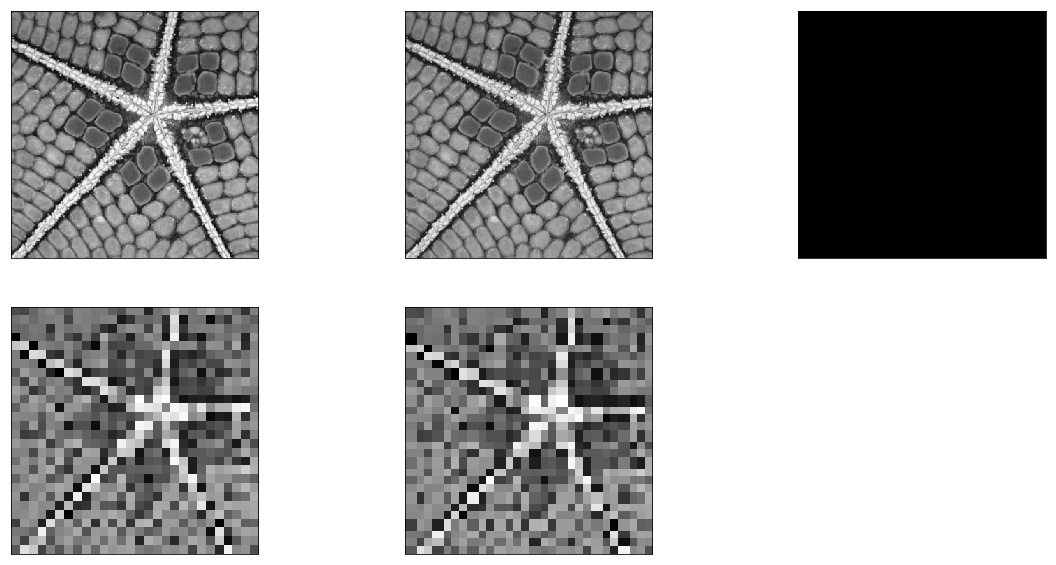

In [273]:
img_min_resize = cv2.resize(img_test, dsize=(1,1), interpolation=cv2.INTER_NEAREST)
img_small_resize = cv2.resize(img_test, dsize=(28,28), interpolation=cv2.INTER_NEAREST)
img_up_resize = cv2.resize(img_small_resize, dsize=(64,64), interpolation=cv2.INTER_NEAREST)

f = np.fft.fft2(img_test)
fshift = np.fft.fftshift(f)

print(fshift.shape)
f_ishift = np.pad(fshift, pad_width=(150,150), mode='constant')

f_ishift = np.fft.ifftshift(f_ishift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
print(img_back.shape)

f = plt.figure(figsize=(20,10))
plt.subplot(231); plt.imshow(img_test, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(232); plt.imshow(img_back, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(233); plt.imshow(img_min_resize, cmap='gray'); plt.xticks([]); plt.yticks([])

plt.subplot(234); plt.imshow(img_small_resize, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.subplot(235); plt.imshow(img_up_resize, cmap='gray'); plt.xticks([]); plt.yticks([])
plt.show()

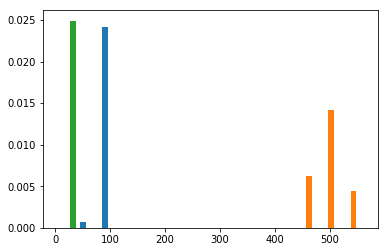

15 (100, 3)


In [323]:
# np.random.rand(10)
# s = np.random.poisson(7, 10000)
s = np.random.poisson(lam=(100., 500., 7.), size=(100, 3))

count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()
print(len(bins), s.shape)